In [ ]:
import numpy as np
import pandas as pd

import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


In [ ]:
duplicates = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Standard deviation of all numerical features
std_dev = X_train.std()
print(std_dev)

LotFrontage                 22.191425
LotArea                  10028.306408
OverallQual                  1.398985
OverallCond                  1.102838
YearBuilt                   30.448539
                             ...     
SaleCondition_AdjLand        0.045314
SaleCondition_Alloca         0.095779
SaleCondition_Family         0.114873
SaleCondition_Normal         0.389325
SaleCondition_Partial        0.292747
Length: 332, dtype: float64


In [ ]:
# Check for null values in each column
null_counts = train.isnull().sum()

# Display columns with missing values
null_counts = null_counts[null_counts > 0]
print(null_counts)

LotFrontage      259
Alley           1367
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
def missing_percent(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percent(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


In [ ]:
missing_percent(test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
MasVnrType,894,61.27
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageCond,78,5.35
GarageFinish,78,5.35


# Observation
* Some features have missing values.
* Most of the features are object( includes string values in the variable).

Focus on the target variable which is **SalePrice.**

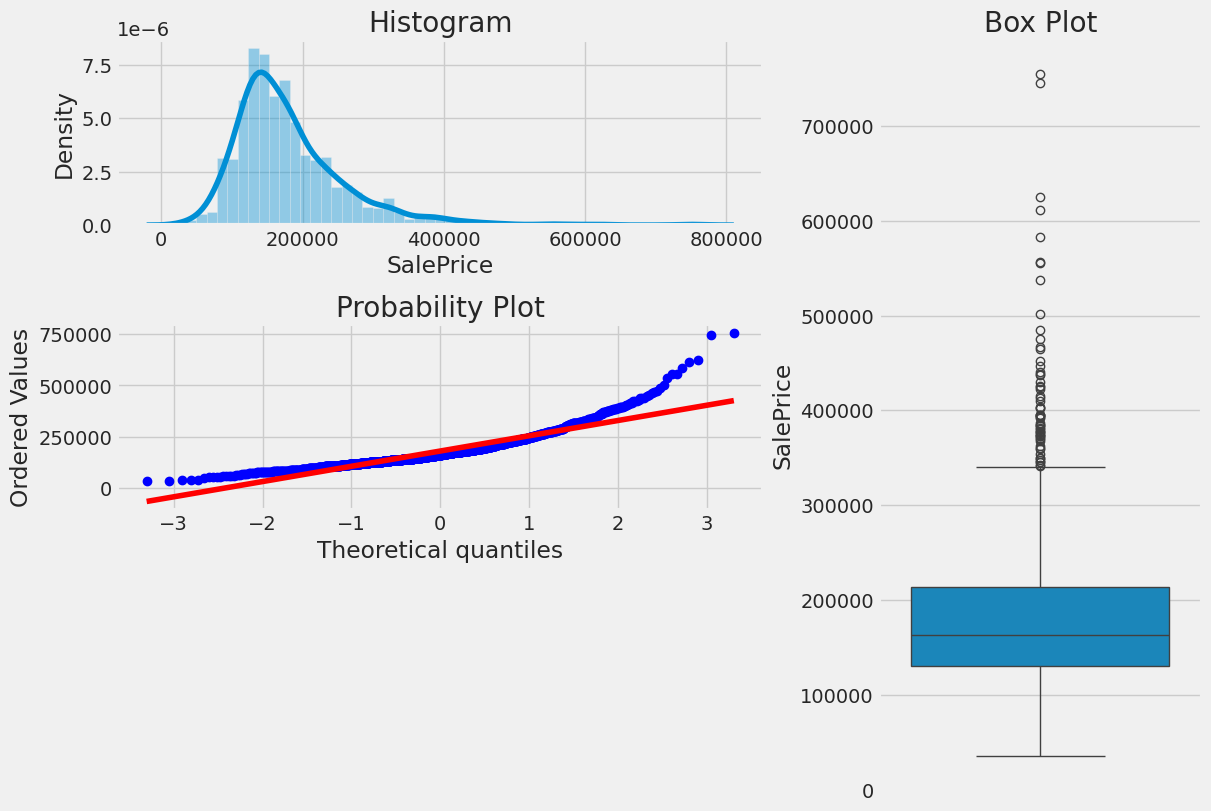

In [ ]:
def plotting_3_chart(df, feature):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

plotting_3_chart(train, 'SalePrice')

In [ ]:
#skewness and kurtosis
print("Ske: " + str(train['SalePrice'].skew()))
print("Kurt: " + str(train['SalePrice'].kurt()))

Ske: 1.8828757597682129
Kurt: 6.536281860064529


In [ ]:
(train.select_dtypes(include=[np.number]).corr()**2)["SalePrice"].sort_values(ascending=False)[1:]

,SalePrice
OverallQual,0.625652
GrLivArea,0.502149
GarageCars,0.410124
GarageArea,0.388667
TotalBsmtSF,0.376481
1stFlrSF,0.367057
FullBath,0.314344
TotRmsAbvGrd,0.284860
YearBuilt,0.273422
YearRemodAdd,0.257151


In [ ]:
def custom_plot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    sns.scatterplot(y = y, x = x);

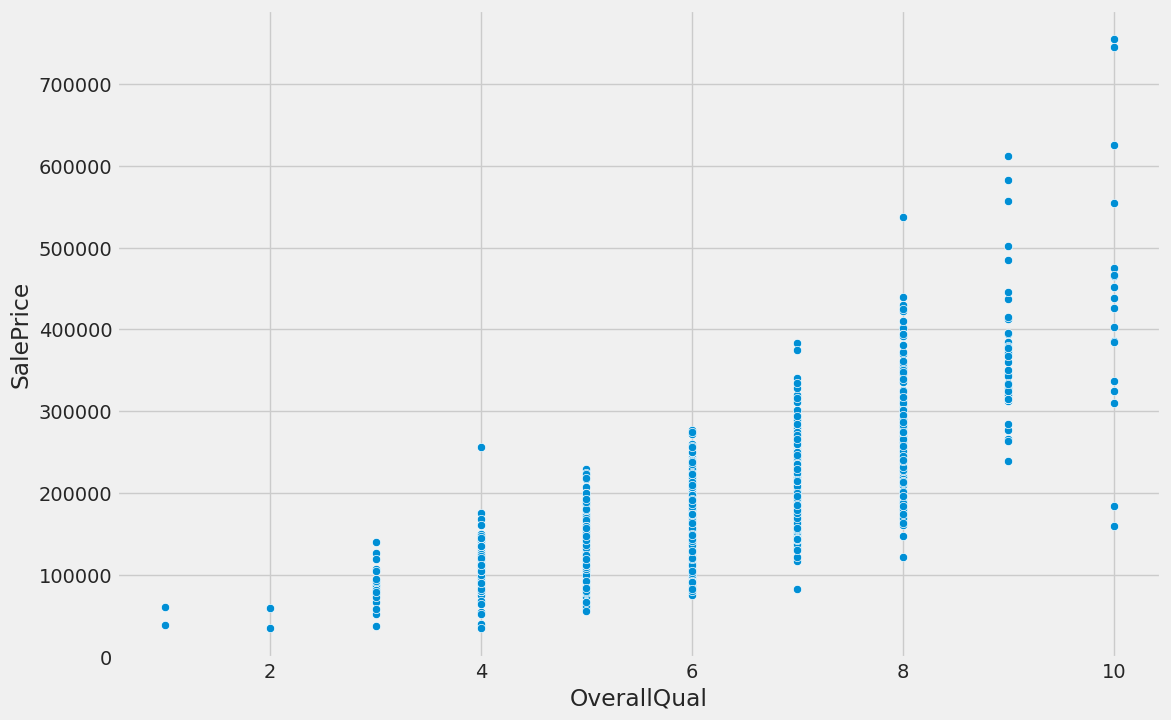

In [ ]:
custom_plot(train.SalePrice, train.OverallQual)

In [ ]:
print(train["OverallQual"].dtype)

int64


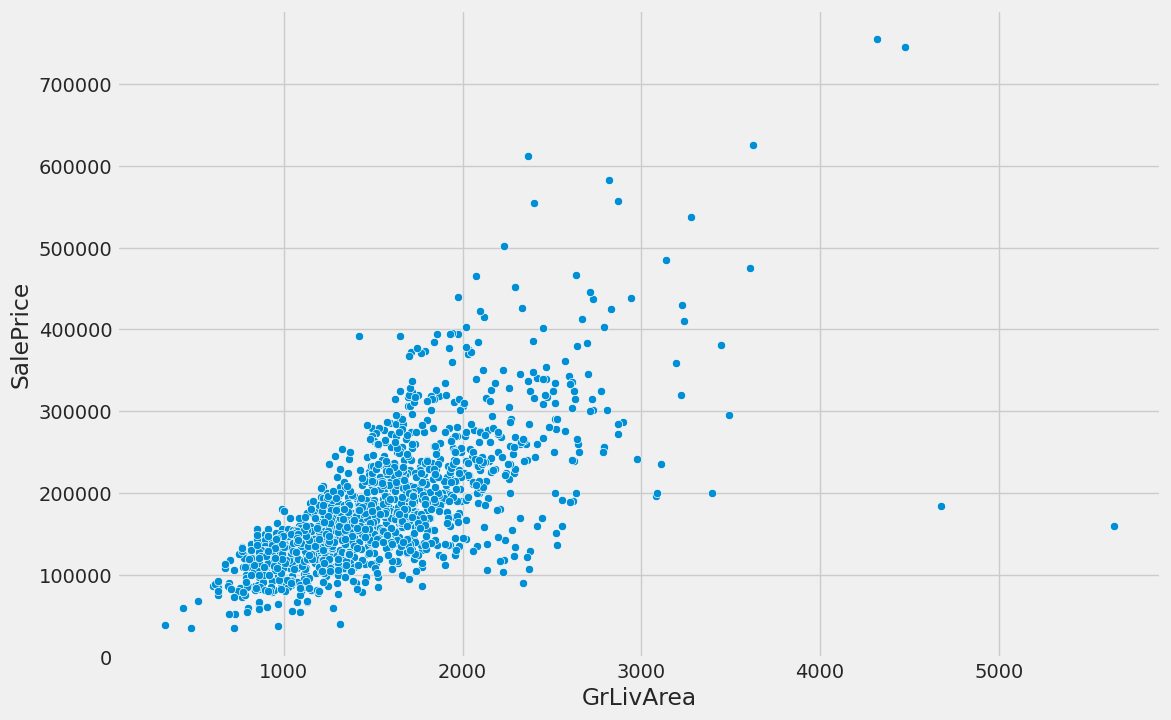

In [ ]:
custom_plot(train.SalePrice, train.GrLivArea)

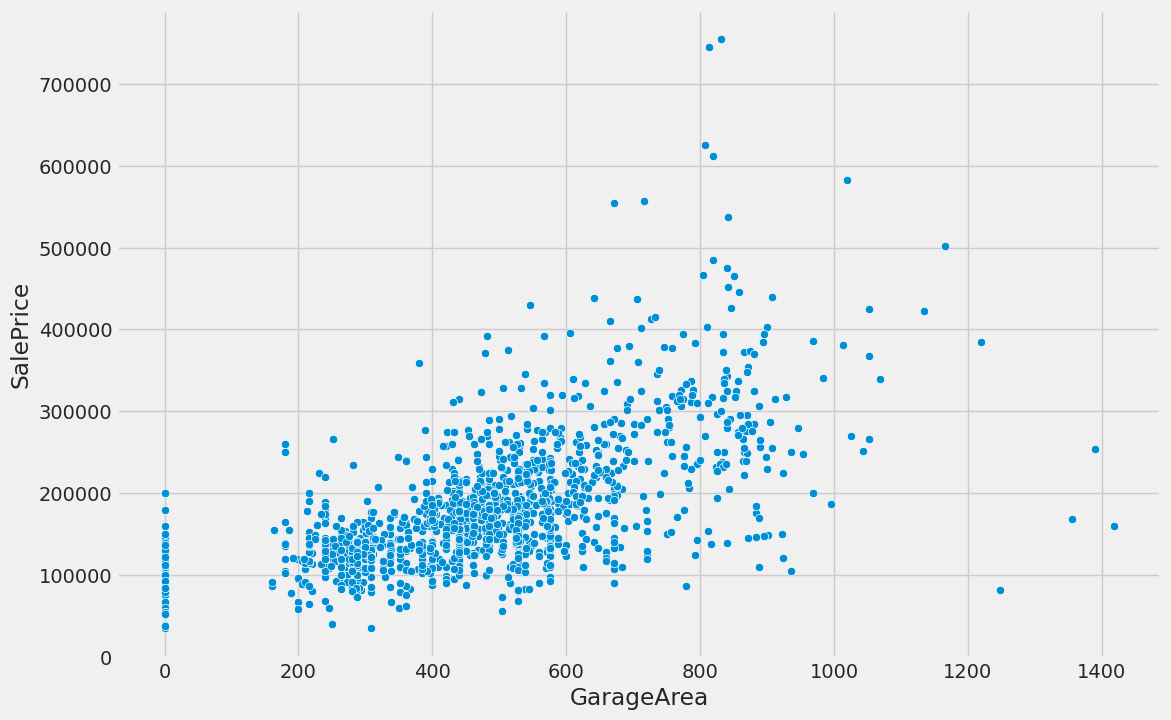

In [ ]:
custom_plot(train.SalePrice, train.GarageArea)

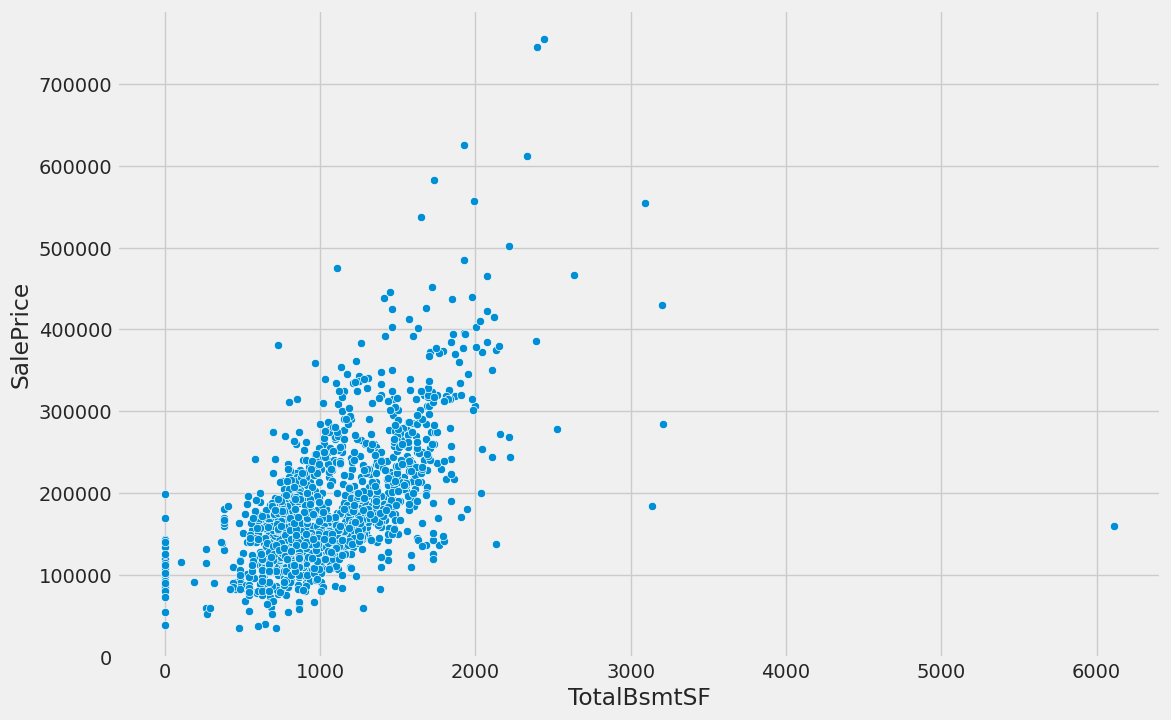

In [ ]:
custom_plot(train.SalePrice, train.TotalBsmtSF)

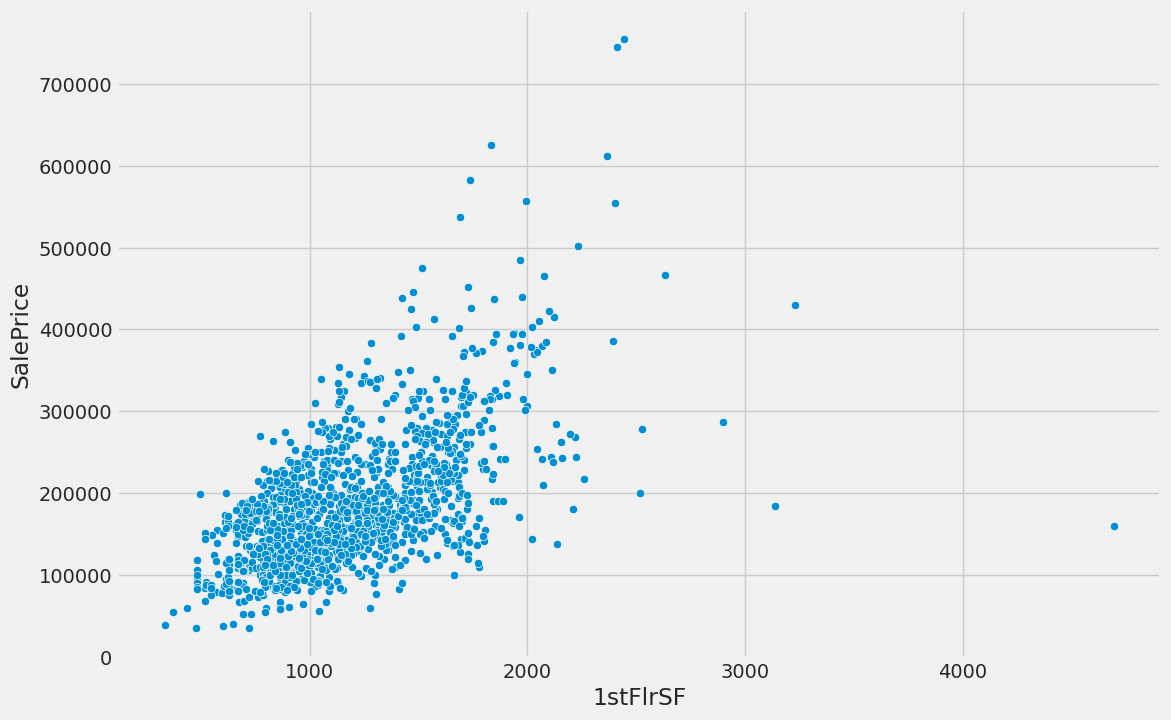

In [ ]:
custom_plot(train.SalePrice, train['1stFlrSF']);

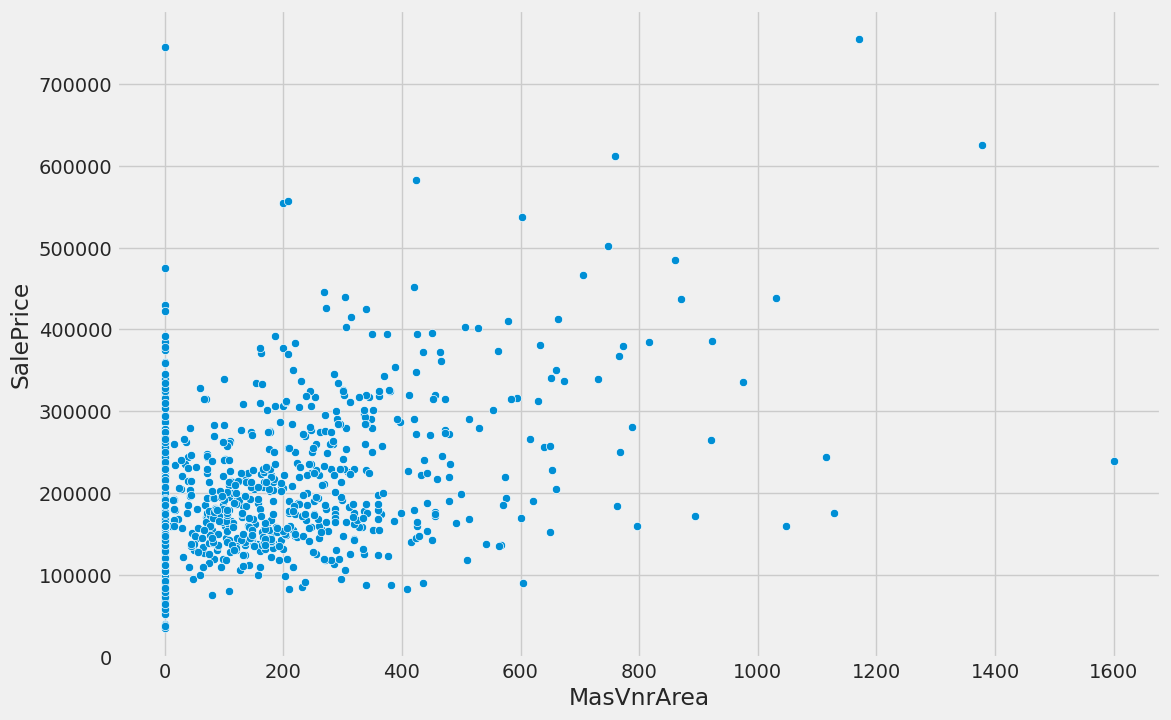

In [ ]:
custom_plot(train.SalePrice, train.MasVnrArea);

# Observations
* Our target variable shows an unequal level of variance across most predictor(independent) variables. This is called Heteroscedasticity

* There are many outliers in the scatter plots

In [ ]:
# Outliers.
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

# copy saved backup
previous_train = train.copy()

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1377.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.251715,56.893004,69.797331,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.753793,438.827160,46.613169,567.096708,1052.537037,1158.851166,345.762003,5.852538,1510.465706,0.423868,0.057613,1.563786,0.38203,2.866255,1.046639,6.510974,0.611111,1978.464052,1.766118,472.050069,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,180932.919067
std,421.601532,42.329437,23.203458,9859.198156,1.376369,1.113359,30.193754,20.641760,179.442156,432.969094,161.420729,442.087187,414.982320,372.039498,435.423924,48.655960,507.878508,0.517404,0.238907,0.549891,0.50271,0.816323,0.220483,1.615880,0.641988,24.682879,0.747104,212.239248,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,79495.055285
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.250000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,730.500000,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,477.500000,991.000000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,479.500000,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.750000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,711.000000,0.000000,808.000000,1296.750000,1390.750000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.00000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4476.000000,3.000000,2.000000,3.000000,2.00000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Assumptions to follow :

Linear Relationship

Multivariate Normality

No Multicollinearity

Homoscedasticity

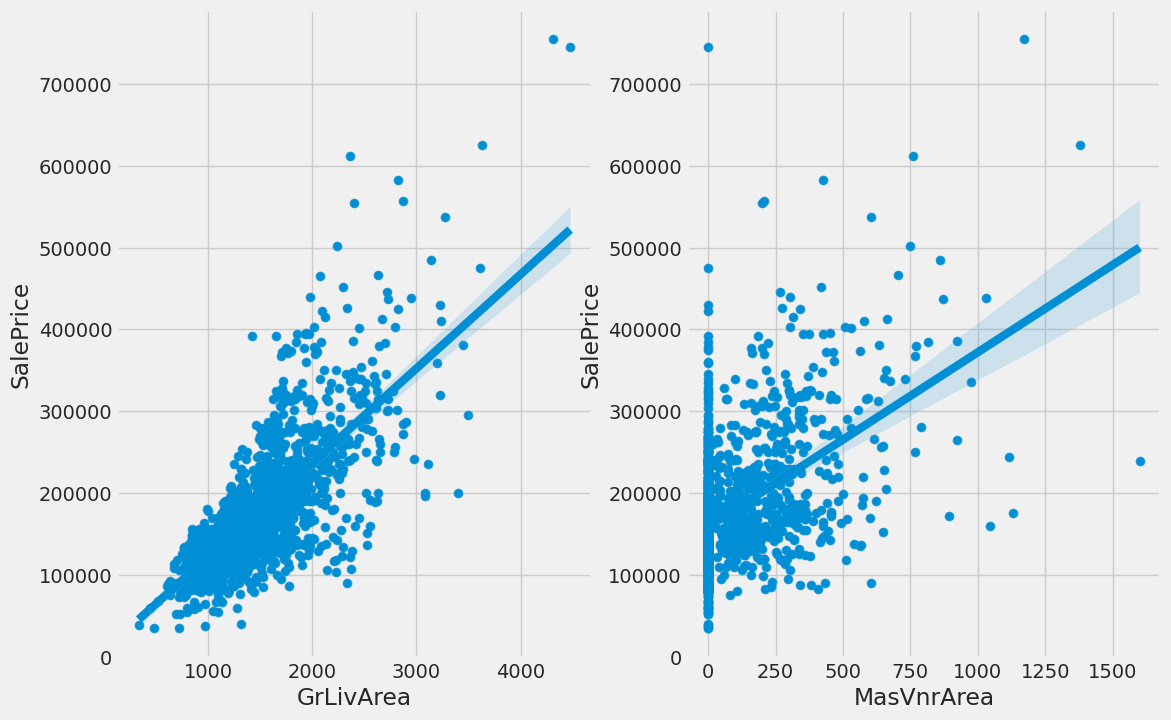

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)

sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2);

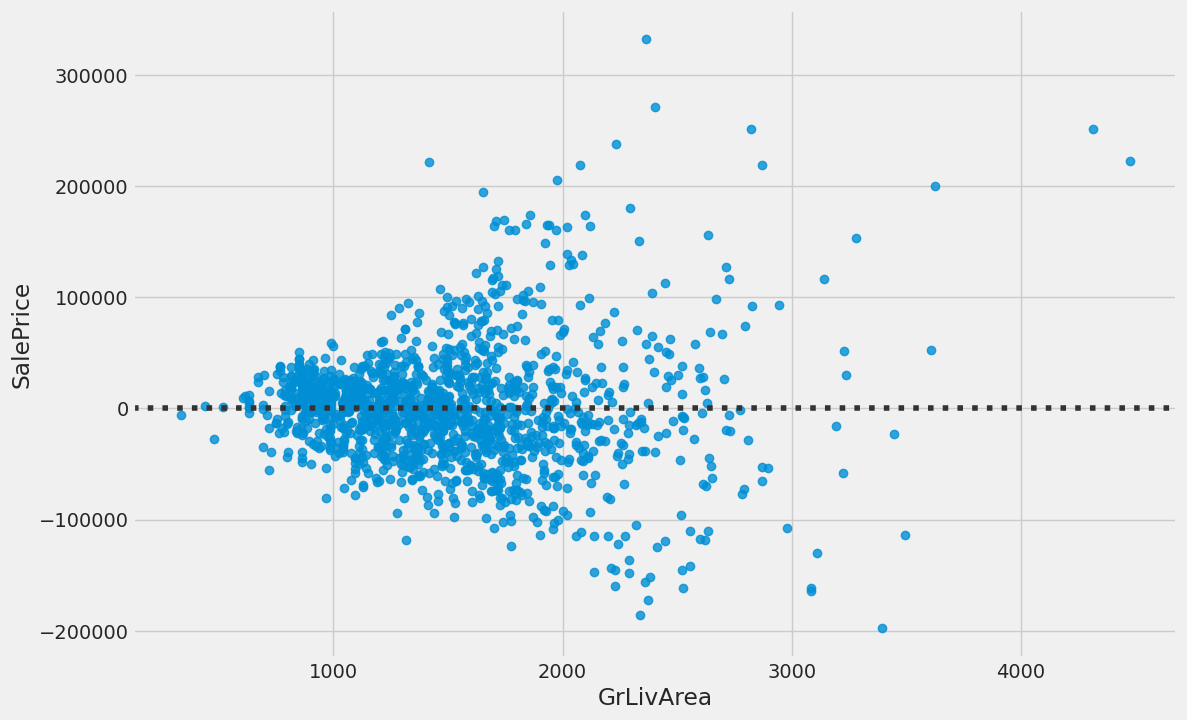

In [ ]:
plt.figure(figsize=(12,8))
sns.residplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.show()

residuals should be randomly scattered around the centerline of zero with no apparent pattern

GrLivArea value increases, the variance increases

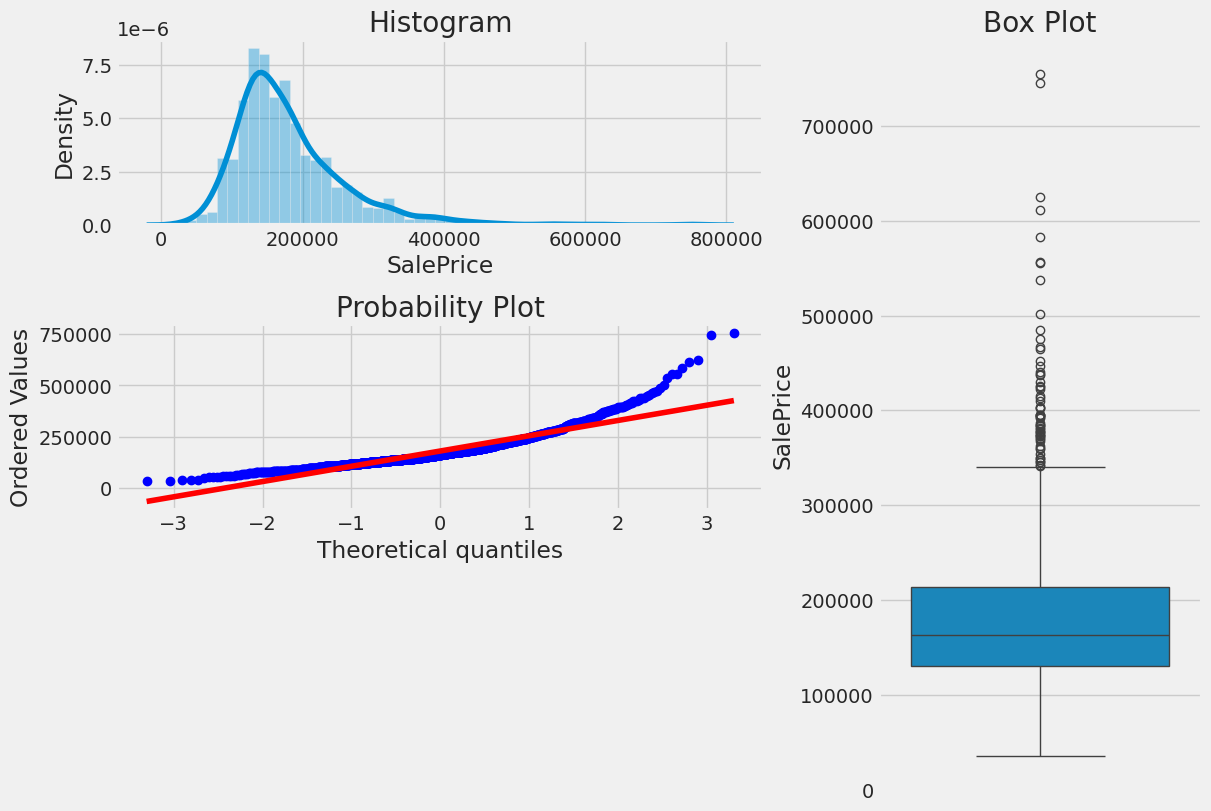

In [ ]:
plotting_3_chart(train, 'SalePrice')

#Normalizing For Homoscedasticity

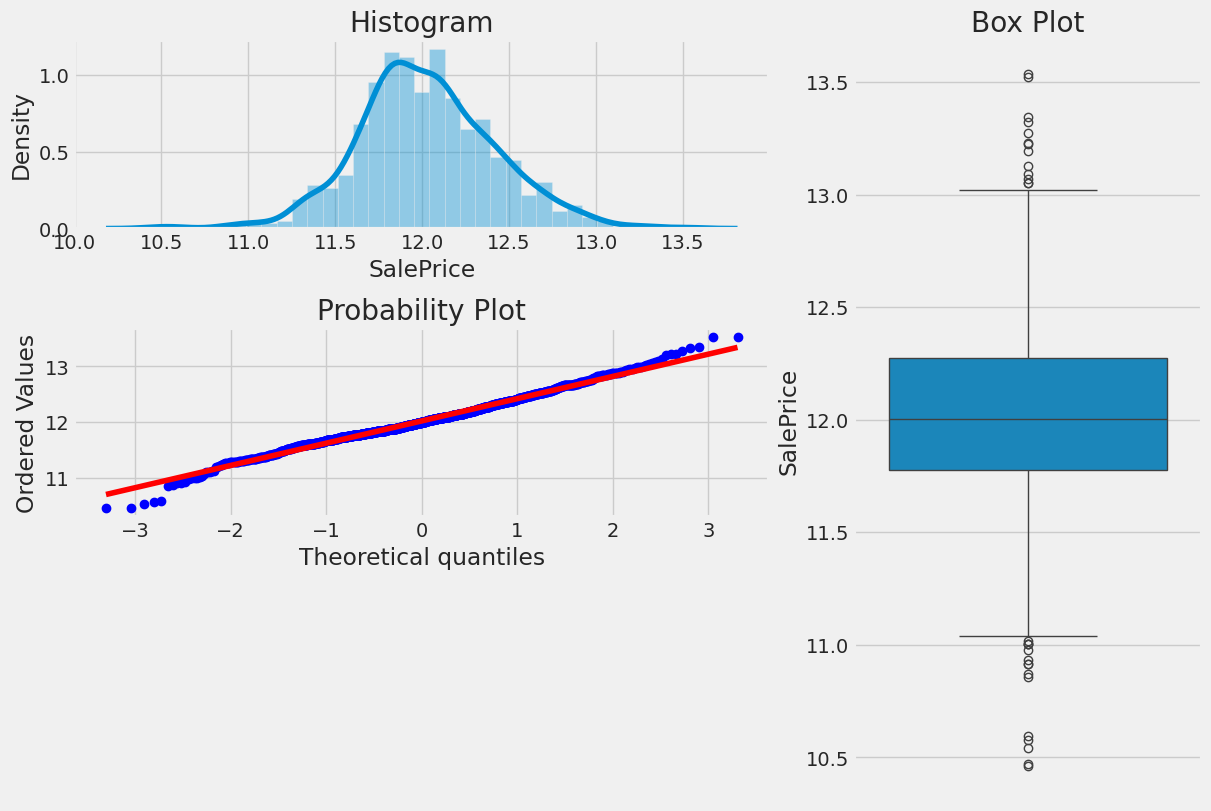

In [ ]:
# Transforming using log1p,
train["SalePrice"] = np.log1p(train["SalePrice"])

# Newly transformed response variable
plotting_3_chart(train, 'SalePrice')

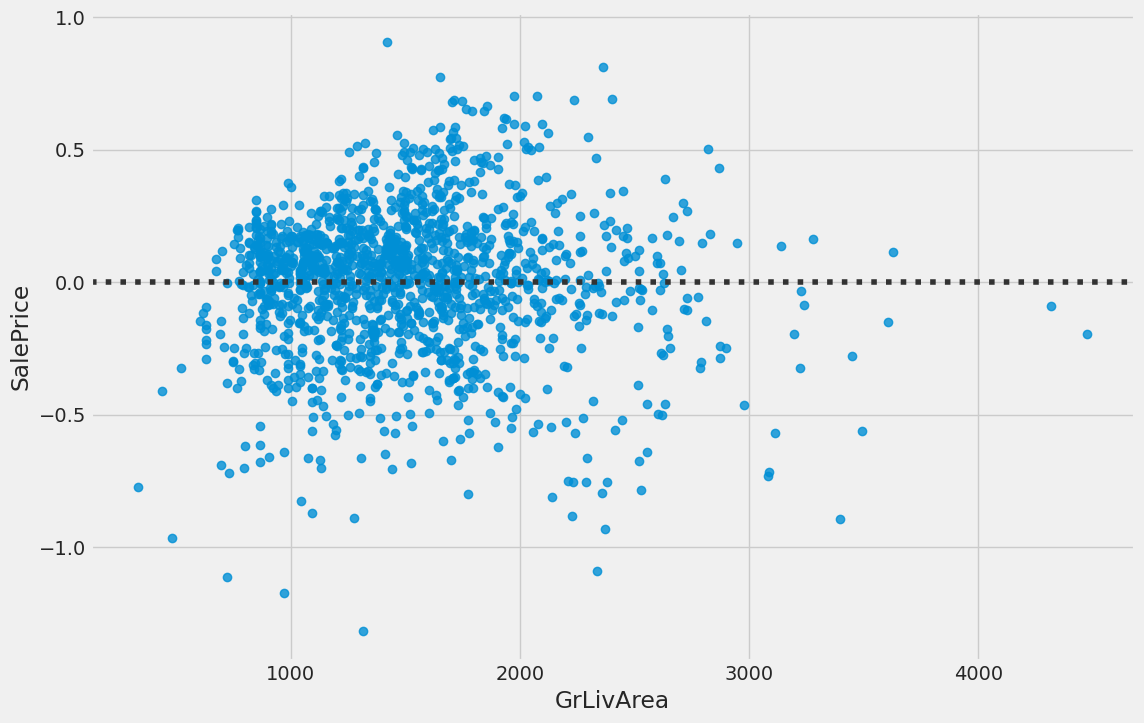

In [ ]:
plt.figure(figsize=(12,8))
sns.residplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.show()

Much better and more random good for linear regression

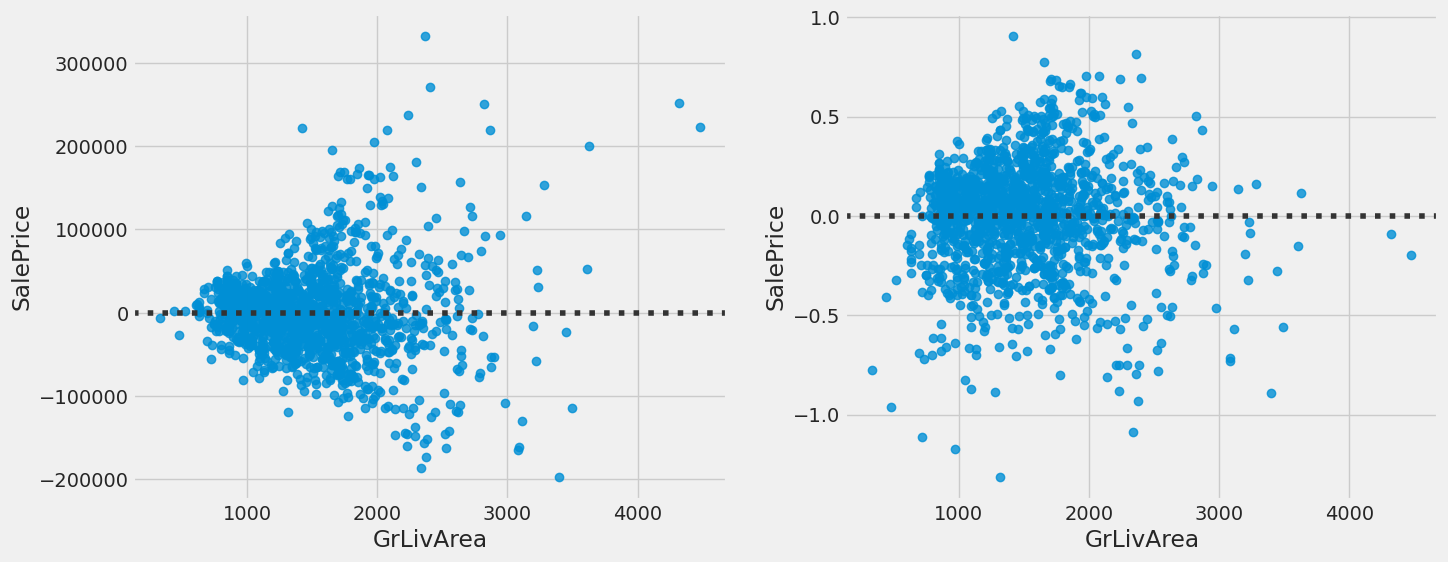

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (15,6), ncols=2, sharey = False, sharex=False)

sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)

sns.residplot(x = train.GrLivArea, y = train.SalePrice, ax = ax2);

#Handling the No or Little Multicolinearity

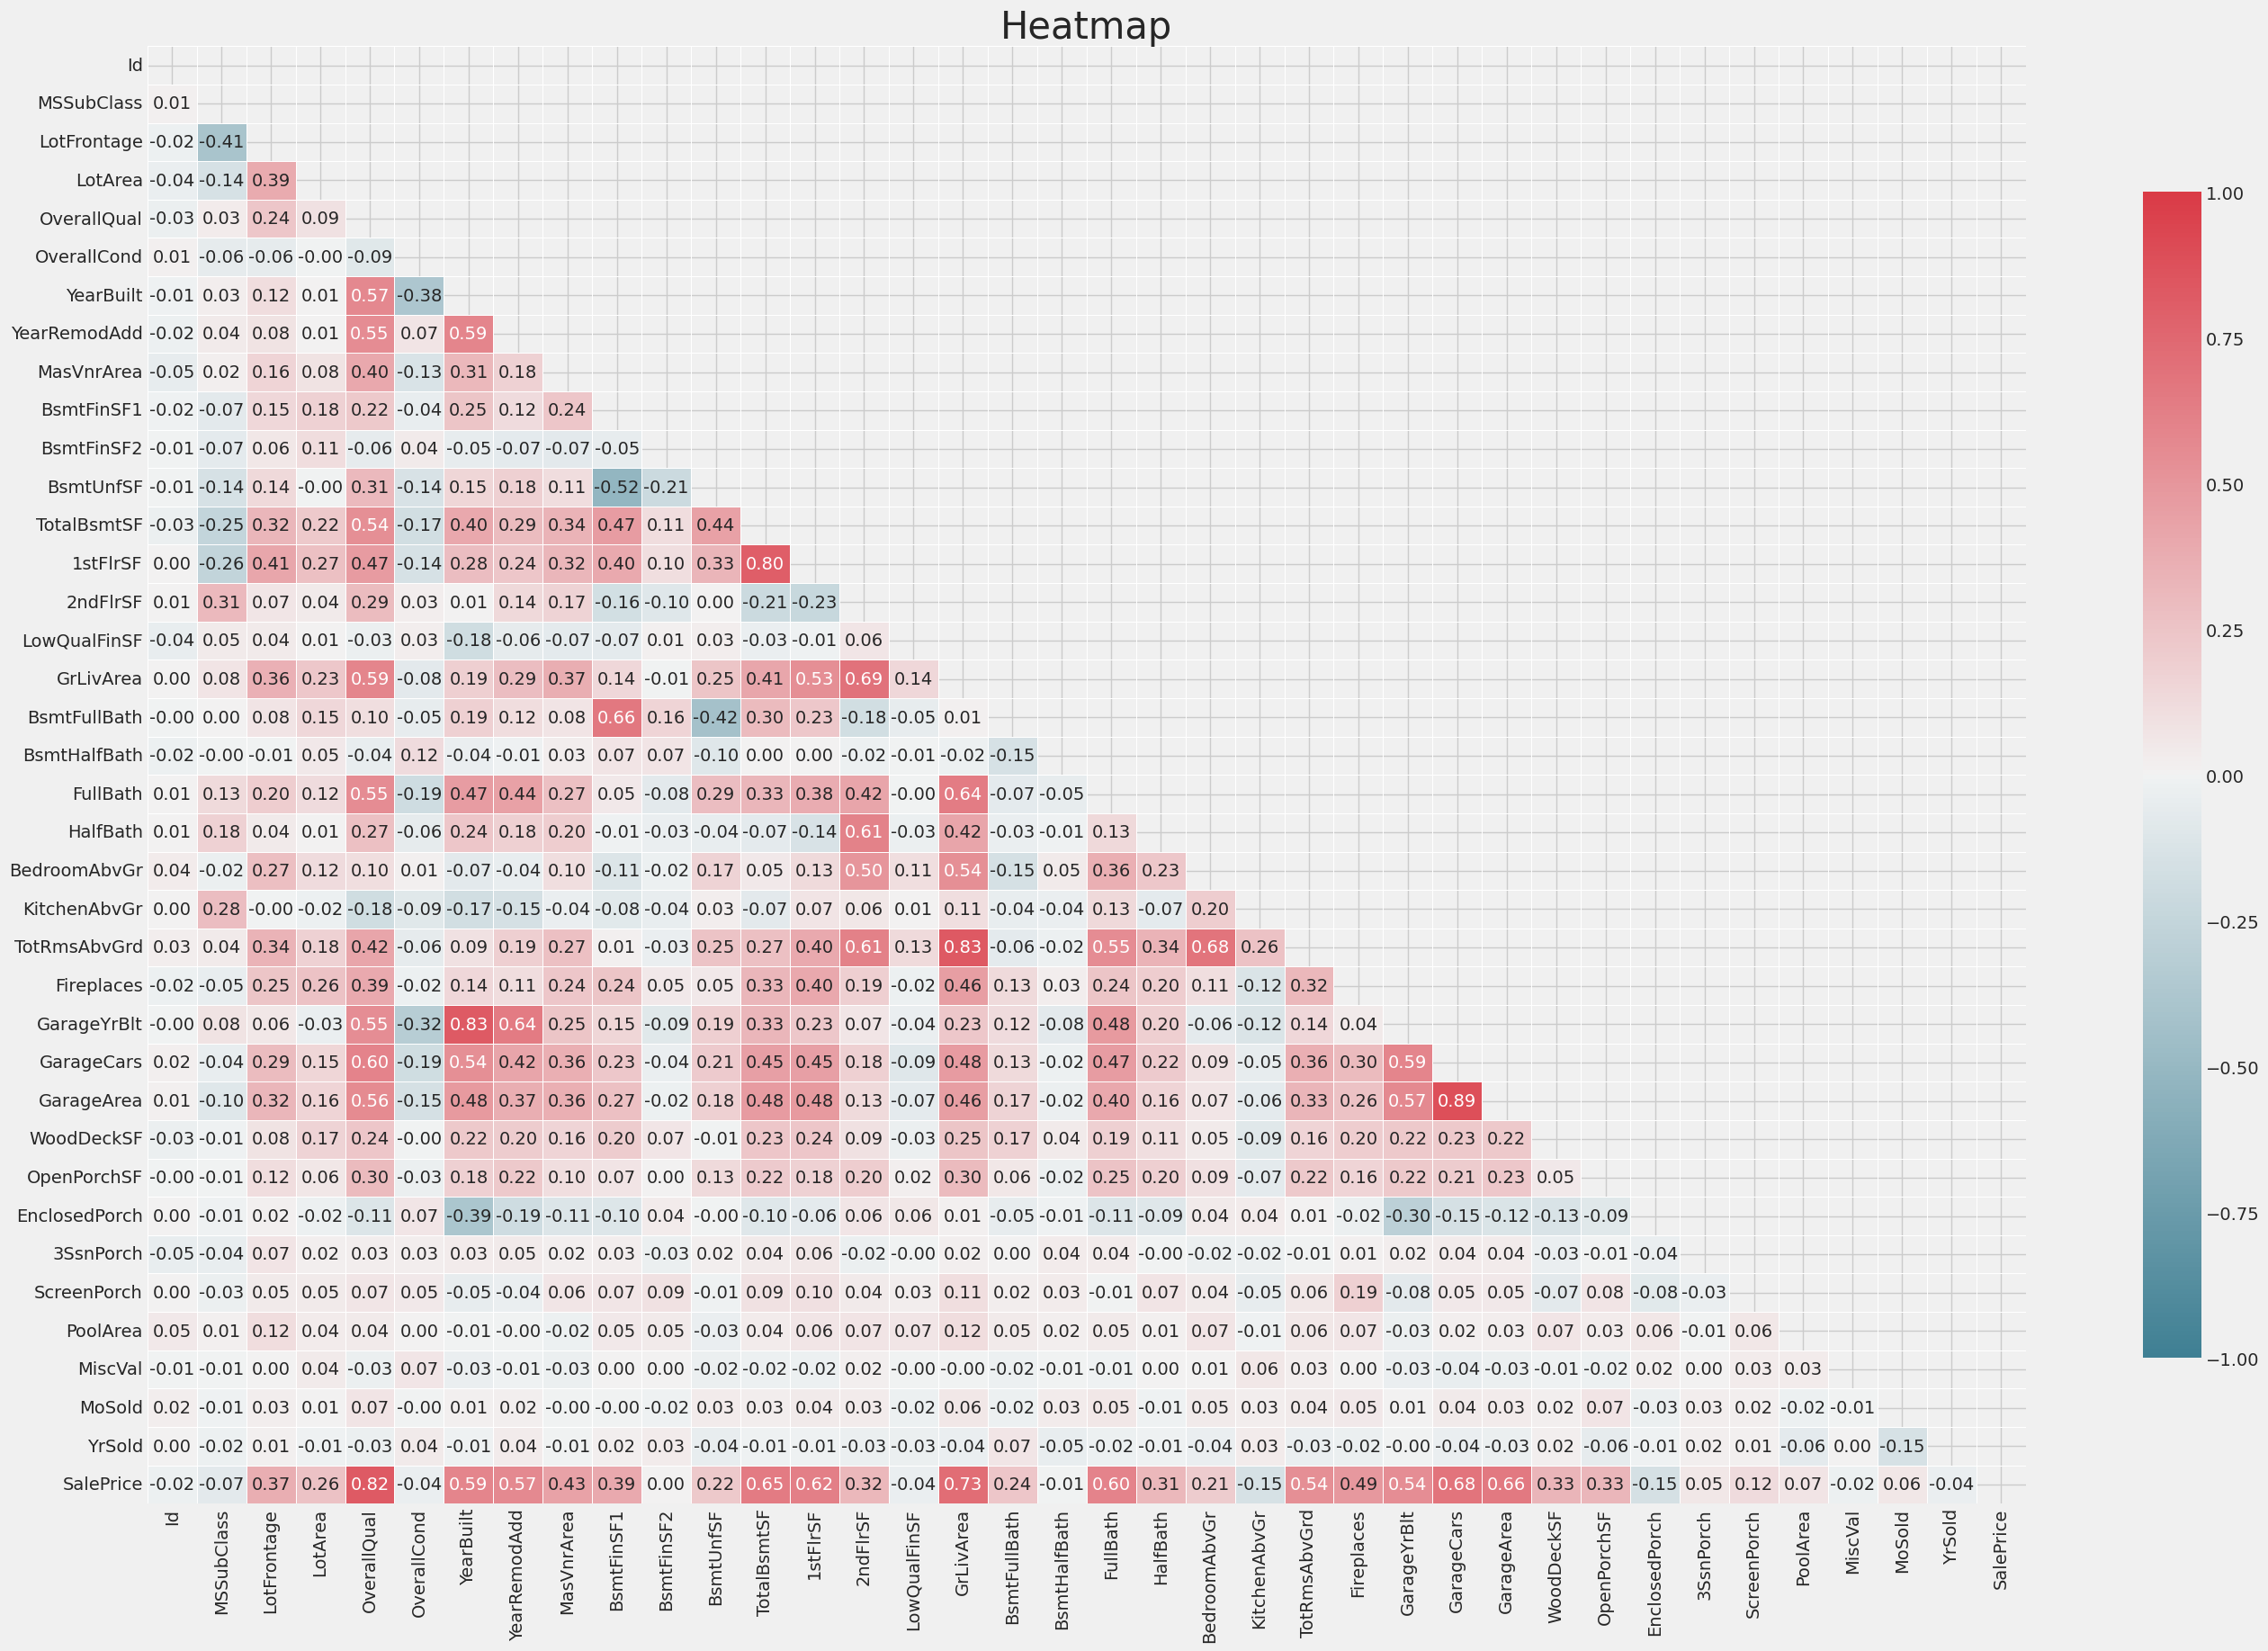

In [ ]:
train_numeric = train.select_dtypes(include=["number"])

corr_matrix = train_numeric.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(30, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, mask=mask, annot=True, fmt=".2f", center=0, linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})

plt.title("Heatmap", fontsize=30)
plt.show()

## Observation.
Multicollinearity still exists in various features.
Regularization models such as Lasso, Ridge will do the clean up later on.

#Data Preprocessing & Feature Engineering :
With the assumptions for regression satisfied, let's move onto preprocessing & feature engineering

In [ ]:
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

## Saving the target values in "y".
y = train['SalePrice'].reset_index(drop=True)

previous_train = train.copy()

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [ ]:
## Combining train and test datasets for efficient preprocessing
all_data = pd.concat((train, test)).reset_index(drop = True)

all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [ ]:
missing_percent(all_data)

,Total,Percent
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
MasVnrType,1766,60.54
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageCond,159,5.45
GarageFinish,159,5.45
GarageYrBlt,159,5.45


<h1>**POINT TO REMEMBER :** Some values are intentionally blank eg. In the Alley feature blank values mean that there are no alley's in that specific house.</h1>

<h1>Replacing them with something trackable</h1>

Categorical :

In [ ]:
missing_val_col = ["Alley",
                   "PoolQC",
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

Numerical :

In [ ]:
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath',
                    'BsmtHalfBath',
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

Next one with higher missing values is LotFrontage

In [ ]:
# Imputing with mean across Neighborhoods as in a neighborhood most likely they'll remain similar
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [ ]:
print(train["MSSubClass"].dtype)
print(train["MSZoning"].dtype)

int64
object


In [ ]:
# Zone related are given numerical, convert them to categorical
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# Important years and months that should be categorical
# all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
# all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")

In [ ]:
missing_percent(all_data)

,Total,Percent


Missing value handling completed

## Fixing Skewness

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

,0
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [ ]:
def fixing_skewness(df):
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    import numpy as np
    import warnings

    numeric_feats = df.dtypes[df.dtypes != "object"].index

    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    problematic_features = ['LotArea', '1stFlrSF']
    warnings.filterwarnings("ignore")

    for feat in skewed_features:
        # Handle non-positive values
        if (df[feat] <= 0).any():
            offset = abs(df[feat].min()) + 1
            df[feat] = df[feat] + offset

        # Use log transformation for problematic features
        if feat in problematic_features:
            df[feat] = np.log1p(df[feat])
        else:
            # Try to use the same transformation as the original notebook
            try:
                # This is what the original notebook does
                df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))
            except Exception:
                # Fall back to log transform if Box-Cox fails
                df[feat] = np.log1p(df[feat])

    warnings.resetwarnings()

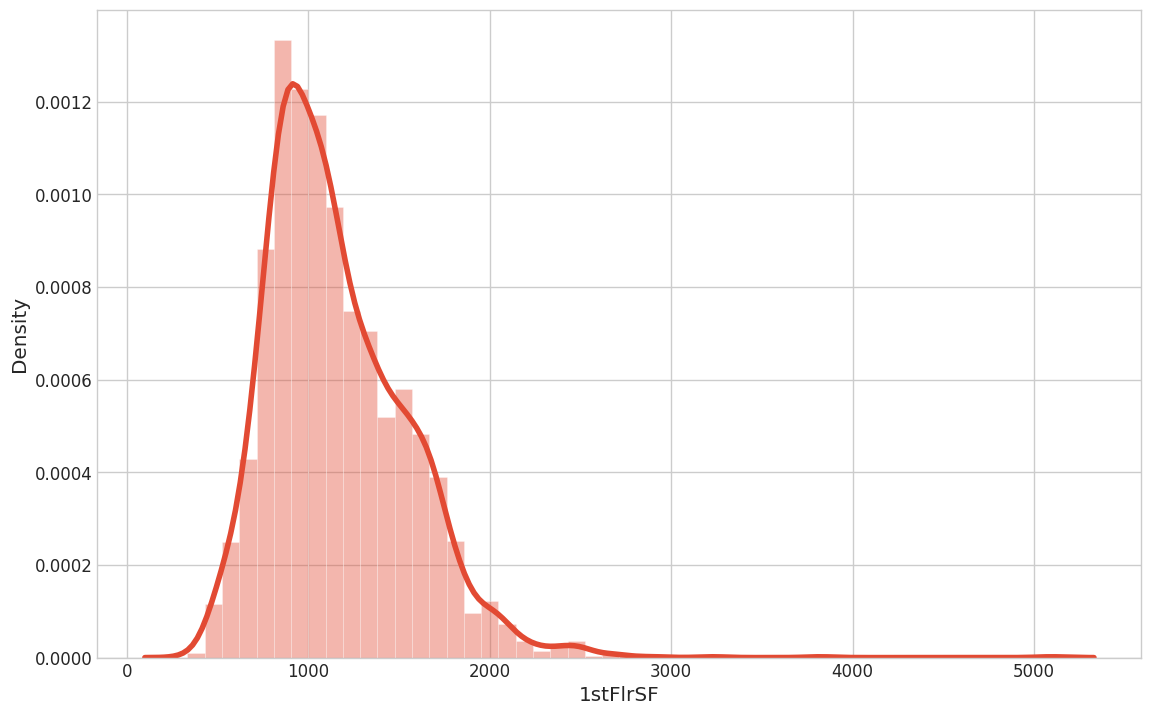

In [ ]:
sns.distplot(all_data['1stFlrSF']);

##New Feature Creation

In [ ]:
all_data['TotalSF'] = (all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1']  + all_data['BsmtFinSF2']  + all_data['1stFlrSF']  + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) + all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] + all_data['EnclosedPorch'] + all_data['ScreenPorch'] + all_data['WoodDeckSF'])

In [ ]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
all_data.shape

(2917, 89)

## Dropping unnecessary columns to avoid issues

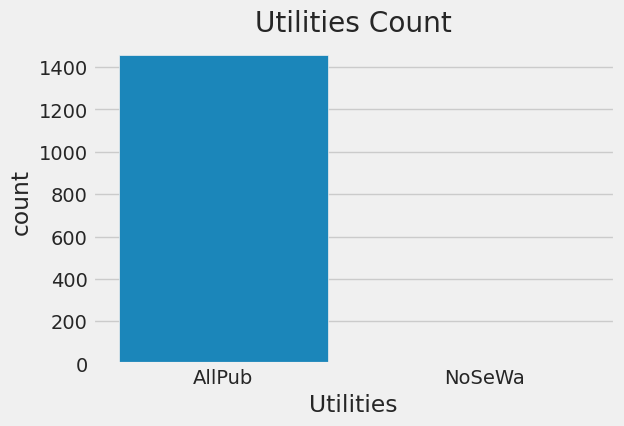

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Utilities', data=train)
plt.title("Utilities Count")
plt.show()

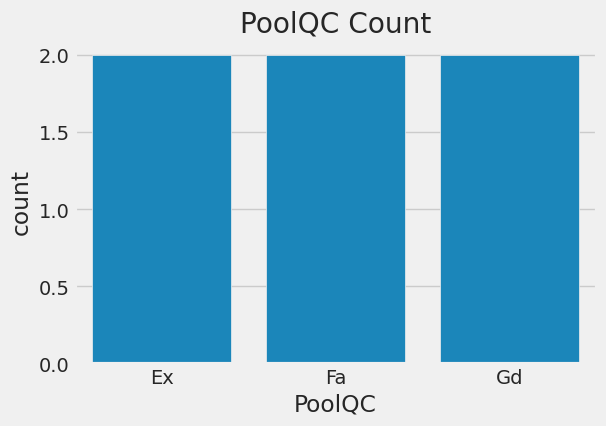

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='PoolQC', data=train)
plt.title("PoolQC Count")
plt.show()

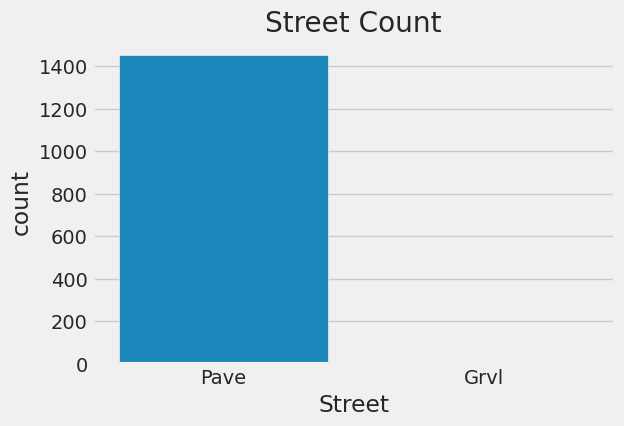

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Street', data=train)
plt.title("Street Count")
plt.show()

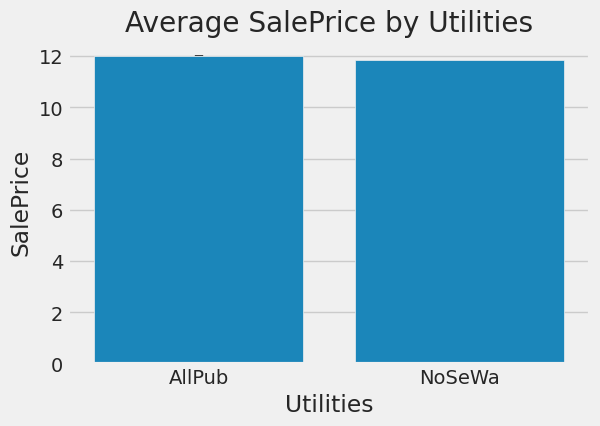

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Utilities', y='SalePrice', data=train)
plt.title("Average SalePrice by Utilities")
plt.show()


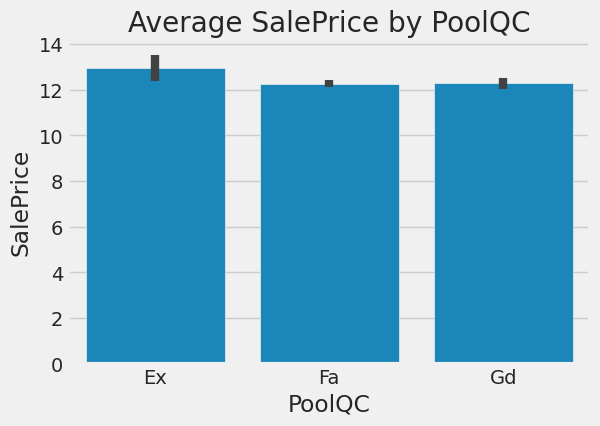

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='PoolQC', y='SalePrice', data=train)
plt.title("Average SalePrice by PoolQC")
plt.show()


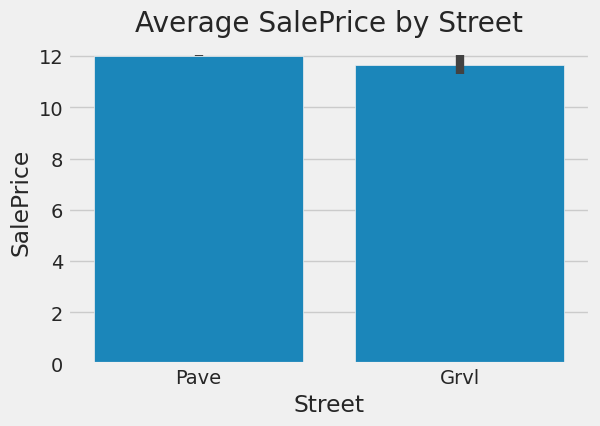

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Street', y='SalePrice', data=train)
plt.title("Average SalePrice by Street")
plt.show()


In [ ]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)


##One Hot Encoding Categorical features into dummy variables

In [ ]:
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2917, 333)

In [ ]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

##Finding & Handling Outliers

In [ ]:
all_data['YrSold'].count()

np.int64(2917)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature = "GrLivArea"

Q1 = X[feature].quantile(0.25)
Q3 = X[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = X[(X[feature] < lower_bound) | (X[feature] > upper_bound)].index

plt.figure(figsize=(10, 6))
plt.scatter(X[feature], y, label="Data", alpha=0.5)
plt.scatter(X.loc[outliers, feature], y.loc[outliers], color='r', label="Outliers")
plt.xlabel(feature)
plt.ylabel("SalePrice (log-transformed)")
plt.title(f"Outliers detected in {feature}")
plt.legend()
plt.show()


In [ ]:
X = X.drop(index=outliers)
y = y.drop(index=outliers)


In [ ]:
counts = X.BsmtUnfSF.value_counts()

In [ ]:
counts.iloc[0]

np.int64(117)

In [ ]:
for i in X.columns:
    counts = X[i].value_counts()
    print (counts)

LotFrontage
60.000000     142
70.000000      70
80.000000      69
50.000000      56
75.000000      52
             ... 
138.000000      1
152.000000      1
84.184049       1
153.000000      1
46.000000       1
Name: count, Length: 132, dtype: int64
LotArea
7200     25
9600     24
6000     17
8400     14
10800    14
         ..
9503      1
19690     1
16381     1
9204      1
16545     1
Name: count, Length: 1068, dtype: int64
OverallQual
5     396
6     374
7     318
8     167
4     115
9      43
3      19
10     16
2       3
1       2
Name: count, dtype: int64
OverallCond
5    816
6    252
7    205
8     72
4     56
3     25
9     22
2      4
1      1
Name: count, dtype: int64
YearBuilt
2006    66
2005    64
2004    54
2007    48
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64
YearRemodAdd
1950    177
2006     97
2007     75
2005     73
2004     62
       ... 
1982      6
1983      5
1952      5
1986      5
1951      4

#Reducing overfitted features


In [ ]:
X.shape,y.shape, X_sub.shape

((1453, 333), (1453,), (1459, 333))

In [ ]:
def overfit_reducer(df):
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.95:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [ ]:
X.shape,y.shape, X_sub.shape

((1453, 332), (1453,), (1459, 332))

##Model Training

Importing required models

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((973, 332), (973,), (480, 332), (480,))

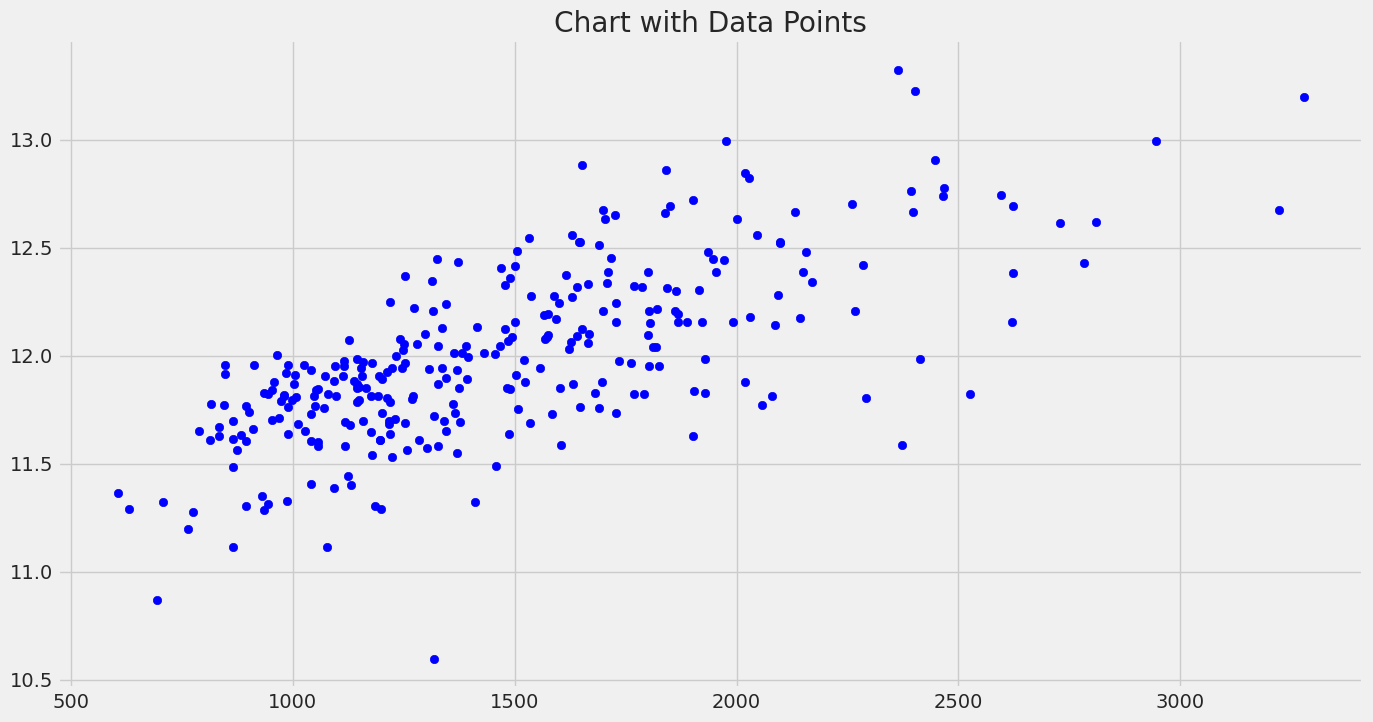

In [ ]:
sample_train = previous_train.sample(300)
import seaborn as sns
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
plt.title("Chart with Data Points");


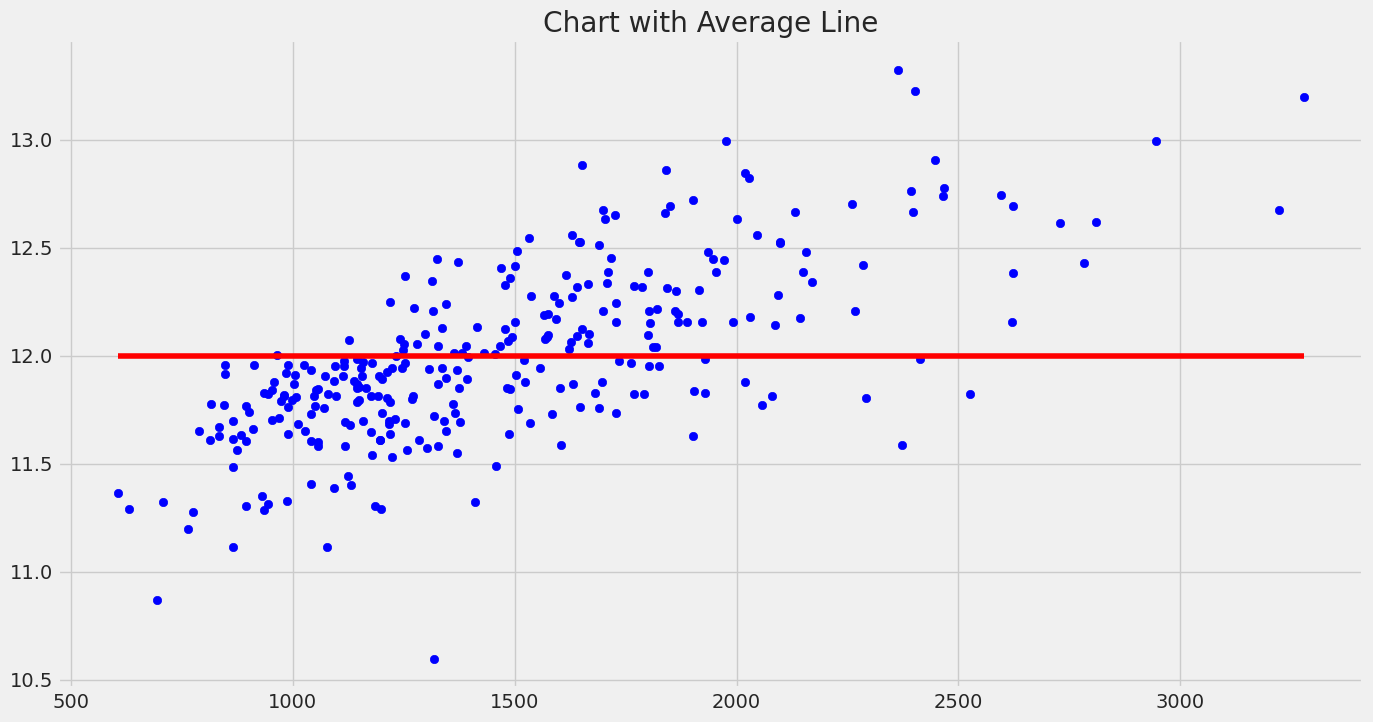

In [ ]:
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');
plt.title("Chart with Average Line");

In [ ]:
sample_train['mean_sale_price'] = sample_train.SalePrice.mean()
sample_train['mse'] = np.square(sample_train.mean_sale_price - sample_train.SalePrice)
sample_train.mse.mean()

print("Mean Squared Error(MSE) for average line is : {}".format(sample_train.mse.mean()))

Mean Squared Error(MSE) for average line is : 0.16353825540054961


In [ ]:
print(sample_train.dtypes)

if sample_train['GrLivArea'].dtype == 'object':
    sample_train['GrLivArea'] = pd.to_numeric(sample_train['GrLivArea'], errors='coerce')

if sample_train['SalePrice'].dtype == 'object':
    sample_train['SalePrice'] = pd.to_numeric(sample_train['SalePrice'], errors='coerce')

sample_train = sample_train.dropna(subset=['GrLivArea', 'SalePrice'])

y_bar = sample_train.SalePrice.mean()
x_bar = sample_train.GrLivArea.mean()
std_y = sample_train.SalePrice.std()
std_x = sample_train.GrLivArea.std()
r_xy = sample_train[['GrLivArea', 'SalePrice']].corr().loc['GrLivArea','SalePrice']
beta_1 = r_xy*(std_y/std_x)
beta_0 = y_bar - beta_1*x_bar

print(f"Beta_0 (intercept): {beta_0:.2f}")
print(f"Beta_1 (slope): {beta_1:.2f}")

MSSubClass           int64
MSZoning            object
LotFrontage        float64
LotArea              int64
Street              object
                    ...   
SaleType            object
SaleCondition       object
SalePrice          float64
mean_sale_price    float64
mse                float64
Length: 82, dtype: object
Beta_0 (intercept): 11.12
Beta_1 (slope): 0.00


In [ ]:
sample_train['Linear_Yhat'] = beta_0 + beta_1*sample_train['GrLivArea']

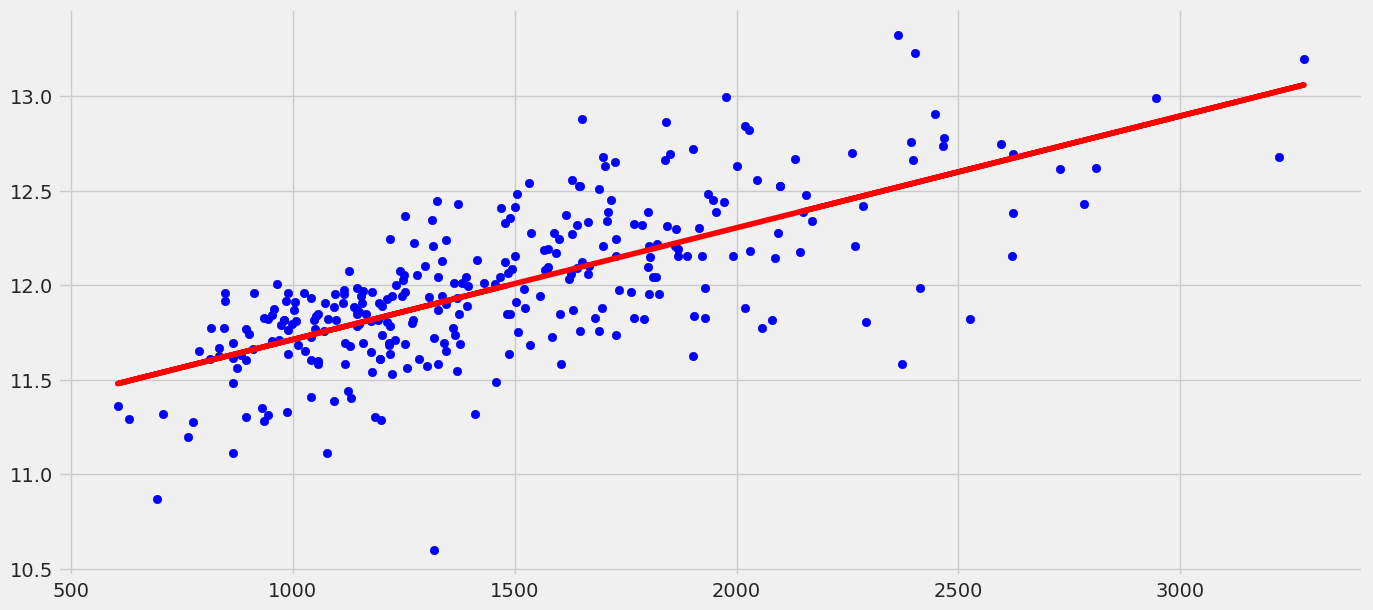

In [ ]:
fig = plt.figure(figsize=(15,7))

ax = plt.gca()

ax.scatter(sample_train.GrLivArea, sample_train.SalePrice, c='b')
ax.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='r');

In [ ]:
print("MSE : {}".format(np.square(sample_train['SalePrice'] - sample_train['Linear_Yhat']).mean()))

Mean Squared Error(MSE) for regression line is : 0.08275466337027267


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)


In [ ]:
print ('%.2f'%mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

378924265.49


#Cross Validation

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

pipeline = make_pipeline(StandardScaler(), LinearRegression())
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')
print('%.8f' % scores.mean())


-0.08065864


##Advanced Fitting for Stacking with Cross Validation

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [ ]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=int(1e7),
  alphas=alphas2,
  random_state=42,
  cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=int(1e7),
  alphas=e_alphas,
  cv=kfolds,
  l1_ratio=e_l1ratio))

svr = make_pipeline(RobustScaler(), SVR(C=20, epsilon=0.008, gamma=0.0003))


In [ ]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)

In [ ]:
lightgbm = LGBMRegressor(objective='regression',
    num_leaves=4,
    learning_rate=0.01,
    n_estimators=5000,
    max_bin=200,
    bagging_fraction=0.75,
    bagging_freq=5,
    bagging_seed=7,
    feature_fraction=0.2,
    feature_fraction_seed=7,
    verbose=-1,
)

In [ ]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
     max_depth=3, min_child_weight=0,
     gamma=0, subsample=0.7,
     colsample_bytree=0.7,
     objective='reg:linear', nthread=-1,
     scale_pos_weight=1, seed=27,
     reg_alpha=0.00006)

In [ ]:
from sklearn.ensemble import StackingRegressor
stack_gen = StackingRegressor(
    estimators=[('ridge', ridge), ('lasso', lasso), ('elasticnet', elasticnet),
               ('xgboost', xgboost), ('lightgbm', lightgbm)],
    final_estimator=xgboost,
    cv=5
)

In [ ]:
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

lasso = LassoCV(max_iter=int(1e7))
score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

Ridge: 0.1047 (0.0142)
 2025-04-04 09:45:28.577546
LASSO: 0.1555 (0.0148)
 2025-04-04 09:45:32.643255
elastic net: 0.1031 (0.0146)
 2025-04-04 09:46:46.142341
SVR: 0.1722 (0.0232)
 2025-04-04 09:46:53.148738
lightgbm: 0.1065 (0.0155)
 2025-04-04 09:47:27.141861
xgboost: 0.1046 (0.0147)
 2025-04-04 09:49:04.544198


##Comparison

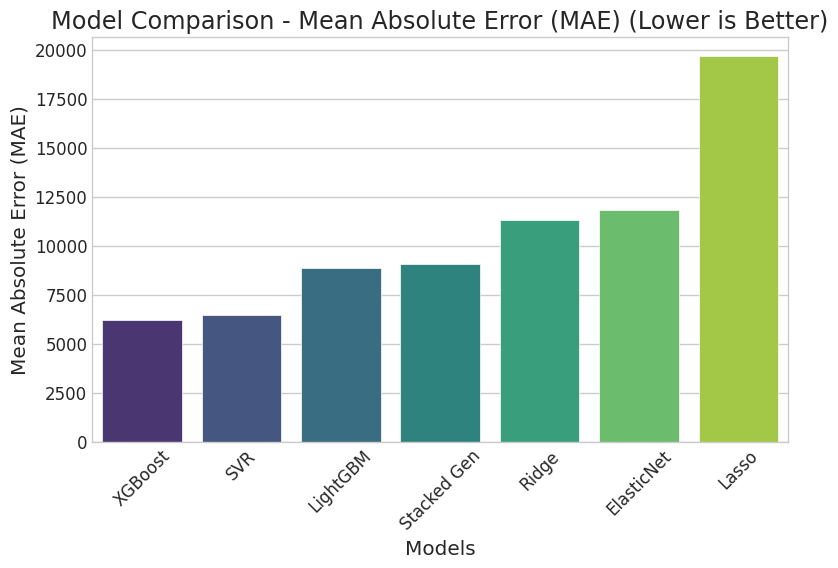

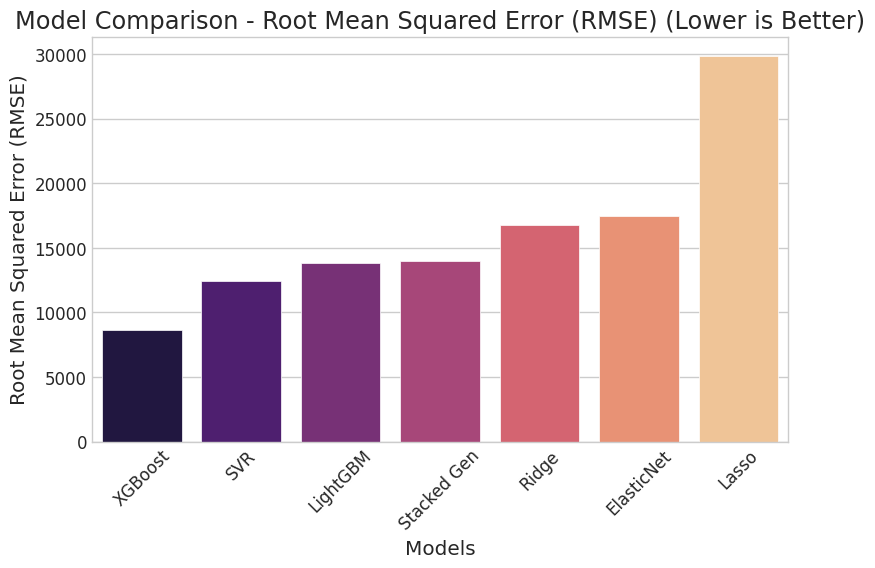

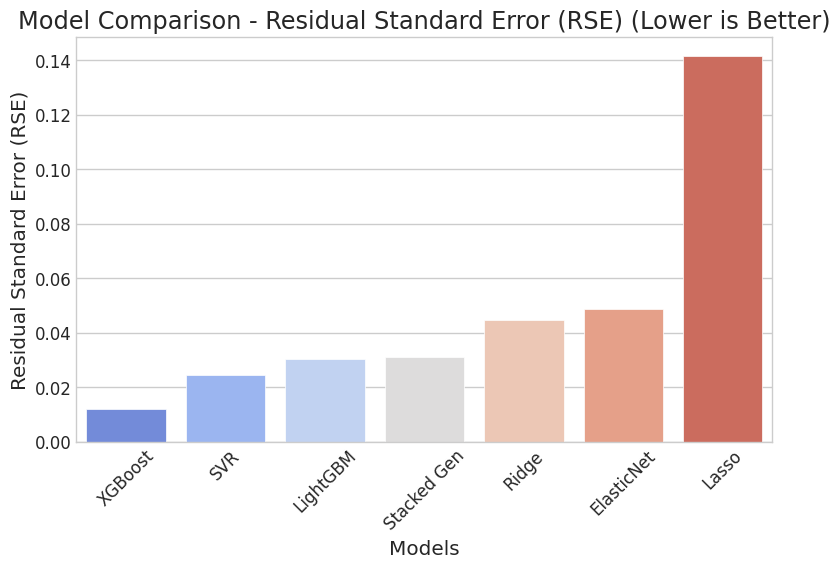

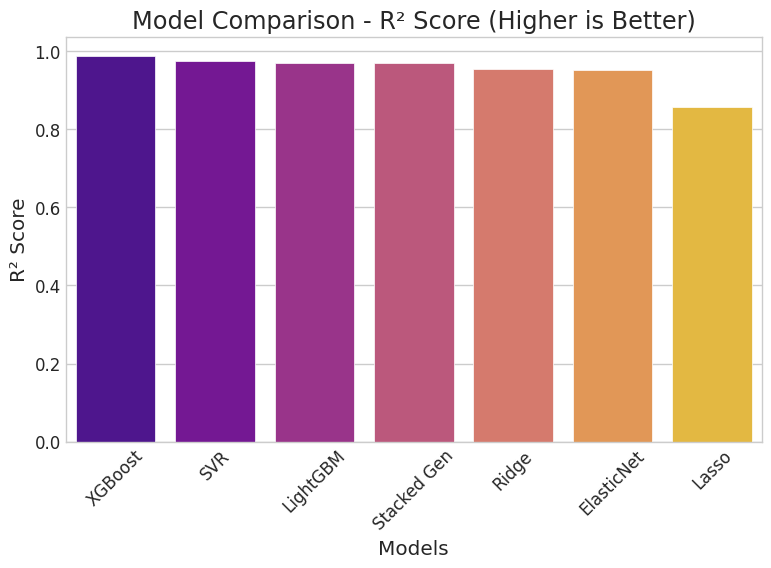

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models and names
models = {
    "Stacked Gen": stack_gen_model,
    "ElasticNet": elastic_model_full_data,
    "Lasso": lasso_model_full_data,
    "Ridge": ridge_model_full_data,
    "SVR": svr_model_full_data,
    "XGBoost": xgb_model_full_data,
    "LightGBM": lgb_model_full_data
}

# Compute MAE, RMSE, RSE, and R² for each model
mae_scores = {}
rmse_scores = {}
rse_scores = {}
r2_scores = {}

for name, model in models.items():
    y_pred = np.expm1(model.predict(X))  # Convert predictions back to original scale
    y_true = np.expm1(y)  # Convert actual values back

    mae_scores[name] = mean_absolute_error(y_true, y_pred)
    rmse_scores[name] = np.sqrt(mean_squared_error(y_true, y_pred))
    rse_scores[name] = np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)  # RSE
    r2_scores[name] = r2_score(y_true, y_pred)  # R² Score

# Function to plot metrics
def plot_metric(scores, metric_name, color):
    scores_sorted = sorted(scores.items(), key=lambda x: x[1], reverse=("R² Score" in metric_name))  # Sort appropriately
    model_names, values = zip(*scores_sorted)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=model_names, y=values, palette=color)  # Flipped: models on x-axis, metric on y-axis
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.title(f"Model Comparison - {metric_name} ({'Higher' if 'R²' in metric_name else 'Lower'} is Better)")
    plt.show()

# Plot all four metrics
plot_metric(mae_scores, "Mean Absolute Error (MAE)", "viridis")
plot_metric(rmse_scores, "Root Mean Squared Error (RMSE)", "magma")
plot_metric(rse_scores, "Residual Standard Error (RSE)", "coolwarm")
plot_metric(r2_scores, "R² Score", "plasma")

In [ ]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(X, y)

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
elasticnet
Lasso
Ridge
Svr
xgboost
lightgbm


Feature Importance With Xgb

In [ ]:
# Get feature importance values
importance = xgb_model_full_data.feature_importances_

# Convert to DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display top features
print(importances_df.head(10))  # Top 10 most important features


               Feature  Importance
2          OverallQual    0.107833
33             TotalSF    0.097553
188       ExterQual_TA    0.093652
24          GarageCars    0.048270
200        BsmtQual_Ex    0.044396
42        hasfireplace    0.039154
250     KitchenQual_TA    0.032039
240       CentralAir_N    0.023627
35   Total_sqr_footage    0.021583
22          Fireplaces    0.020283


Bias Variance Check :

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions on train and test data
y_train_pred = xgb_model_full_data.predict(X_train)
y_test_pred = xgb_model_full_data.predict(X_test)

# Compute Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Bias-Variance Analysis
if train_mse < 0.01 and test_mse > 10 * train_mse:
    print("⚠️ High Variance (Overfitting)")
elif train_mse > 1 and test_mse > train_mse:
    print("⚠️ High Bias (Underfitting)")
else:
    print("✅ Model has a good bias-variance tradeoff")

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model_full_data, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores  # Convert negative MSE to positive

print(f"Cross-Validation MSE Scores: {cv_mse}")
print(f"Mean CV MSE: {cv_mse.mean():.4f}")
print(f"Standard Deviation of CV MSE: {cv_mse.std():.4f}")

if cv_mse.std() > cv_mse.mean() * 0.5:
    print("⚠️ High variance detected (Overfitting)")
else:
    print("✅ Model has stable predictions")


## weights calculation for stack model

#Blending

In [ ]:
1.0 * elastic_model_full_data.predict(X)

array([12.22804284, 12.18689077, 12.27672959, ..., 12.45175612,
       11.83434537, 11.93422215])

In [ ]:
import numpy as np
import pandas as pd

def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.2 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))


submission = pd.read_csv("sample_submission.csv")

submission.iloc[:, 1] = np.floor(np.expm1(blend_models_predict(X_sub)))

q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x * 0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x * 1.1)

submission.to_csv("submission.csv", index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv


In [ ]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.2 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert predictions and actual values back to original scale
y_pred_train = np.expm1(blend_models_predict(X))
y_true_train = np.expm1(y)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true_train, y_pred_train)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true_train, y_pred_train))

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_error(np.log1p(y_true_train), np.log1p(y_pred_train)))

# R² Score
r2 = r2_score(y_true_train, y_pred_train)

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RMSLE: {rmsle:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 8691.8236
RMSE: 12900.4140
RMSLE: 0.0685
R² Score: 0.9736


In [ ]:
from scipy.optimize import minimize
import numpy as np

def optimize_weights(weights):
    weights = np.array(weights)
    weights /= np.sum(weights)

    blended_preds = (weights[0] * elastic_model_full_data.predict(X) +
                     weights[1] * lasso_model_full_data.predict(X) +
                     weights[2] * ridge_model_full_data.predict(X) +
                     weights[3] * svr_model_full_data.predict(X) +
                     weights[4] * xgb_model_full_data.predict(X) +
                     weights[5] * lgb_model_full_data.predict(X) +
                     weights[6] * stack_gen_model.predict(np.array(X)))

    return np.sqrt(np.mean((blended_preds - y) ** 2))

initial_weights = [1/7] * 7

result = minimize(optimize_weights, initial_weights, method='Nelder-Mead')
best_weights = result.x / sum(result.x)
print("Optimized Weights:", best_weights)


## HP Tuning

In [ ]:
# #HP Tuning
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge, Lasso, ElasticNet
# from sklearn.svm import SVR

# def tune_hyperparameters(model, param_grid, X_train, y_train, cv=5, n_iter=20):
#     """
#     Generic function to perform hyperparameter tuning using RandomizedSearchCV.

#     model: The model to tune.
#     param_grid: Dictionary of hyperparameters to search.
#     X_train, y_train: Training data.
#     cv: Number of cross-validation folds.
#     n_iter: Number of random search iterations.

#     Returns: The best model with optimized hyperparameters.
#     """
#     search = RandomizedSearchCV(model, param_distributions=param_grid,
#                                 n_iter=n_iter, cv=cv, scoring='neg_root_mean_squared_error',
#                                 n_jobs=-1, verbose=1, random_state=42)

#     search.fit(X_train, y_train)
#     print(f"Best parameters for {model.__class__.__name__}: {search.best_params_}")

#     return search.best_estimator_

# # Define hyperparameter grids
# param_grids = {
#     "LGBMRegressor": {
#         "num_leaves": [4, 8, 16, 31],
#         "learning_rate": [0.005, 0.01, 0.05, 0.1],
#         "n_estimators": [1000, 3000, 5000],
#         "max_bin": [100, 200, 300],
#         "bagging_fraction": [0.5, 0.75, 1.0],
#         "feature_fraction": [0.1, 0.2, 0.3],
#     },
#     "XGBRegressor": {
#         "n_estimators": [500, 1000, 3000],
#         "learning_rate": [0.01, 0.05, 0.1],
#         "max_depth": [3, 5, 7],
#         "subsample": [0.5, 0.7, 1.0],
#         "colsample_bytree": [0.5, 0.7, 1.0],
#     },
#     "Ridge": {
#         "alpha": np.logspace(-3, 3, 10),
#     },
#     "Lasso": {
#         "alpha": np.logspace(-3, 3, 10),
#         "max_iter": [1000, 5000, 10000]
#     },
#     "ElasticNet": {
#         "alpha": np.logspace(-3, 3, 10),
#         "l1_ratio": [0.1, 0.5, 0.9]
#     },
#     "SVR": {
#         "C": [0.1, 1, 10, 20],
#         "epsilon": [0.001, 0.01, 0.1],
#         "gamma": ['scale', 'auto', 0.0003, 0.001, 0.01]
#     }
# }

# # Train models with tuning
# X_train, y_train = X, y  # Assuming X, y are already preprocessed

# lightgbm = tune_hyperparameters(LGBMRegressor(objective='regression', verbose=-1),
#                                 param_grids["LGBMRegressor"], X_train, y_train)

# xgboost = tune_hyperparameters(XGBRegressor(objective="reg:squarederror"),
#                                param_grids["XGBRegressor"], X_train, y_train)

# ridge = tune_hyperparameters(Ridge(), param_grids["Ridge"], X_train, y_train)
# lasso = tune_hyperparameters(Lasso(), param_grids["Lasso"], X_train, y_train)
# elasticnet = tune_hyperparameters(ElasticNet(), param_grids["ElasticNet"], X_train, y_train)
# svr = tune_hyperparameters(SVR(), param_grids["SVR"], X_train, y_train)
